In [57]:
# ==========================================================
# TELCO CUSTOMER CHURN ANALYSIS
# ----------------------------------------------------------
# Goal: Analyze customer churn and build predictive models
#       using Random Forest and XGBoost.
# Author: Amran Thaqif Rajendra
# ==========================================================

# 1. Import required libraries
import pandas as pd

# 2. Load the Telco Customer Churn dataset
df = pd.read_csv('telco_customer_churn.csv')

# 3. Display the first few rows to verify successful loading
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [58]:
# 4. Check for missing values in each column
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [59]:
# 5. Display dataset info (data types, non-null counts, memory usage)
print(df.info())

# 6. Show descriptive statistics for numerical columns
print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
# ==========================================
# DATA CLEANING
# ==========================================
# The 'TotalCharges' column should be numeric, but it is read as an object.
# Convert it to numeric; any conversion errors will be replaced with NaN.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [61]:
# Check for new missing values after conversion
print(df.info())

print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


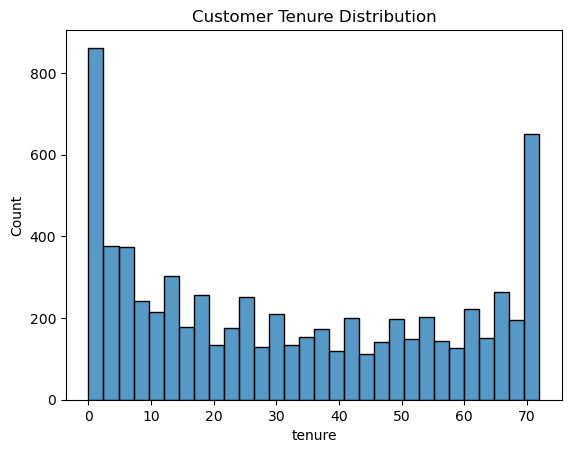

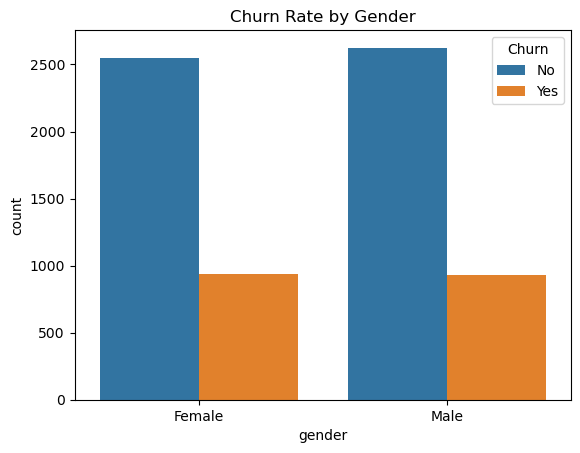

In [62]:
# ==========================================
# DATA VISUALIZATION / EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of customer tenure
sns.histplot(df['tenure'], bins=30)
plt.title("Customer Tenure Distribution")
plt.show()

# Churn distribution by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn Rate by Gender")
plt.show()

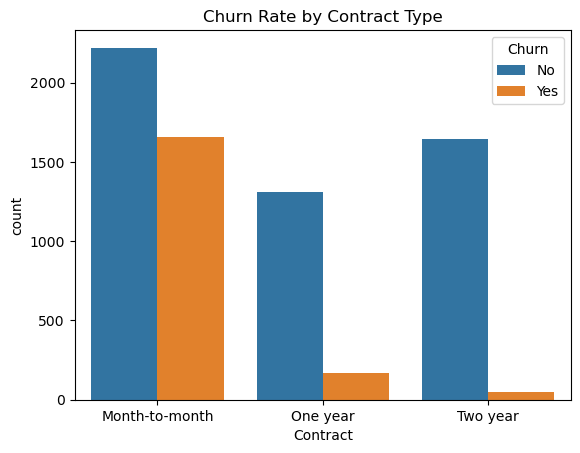

In [63]:
# Churn distribution by contract type

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

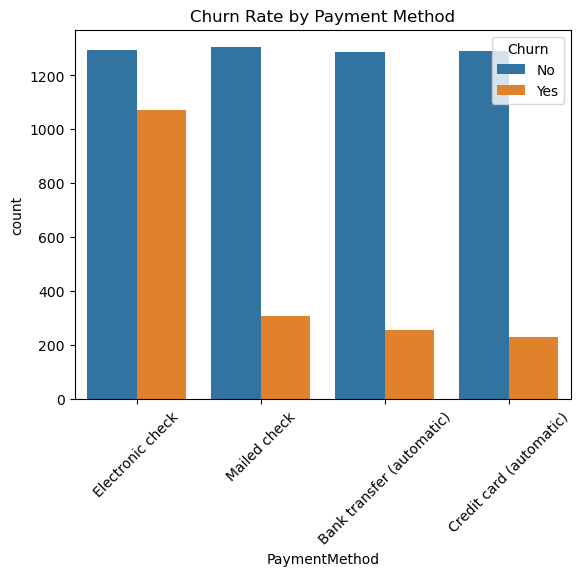

In [64]:
# Churn distribution by payment method

sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.show()

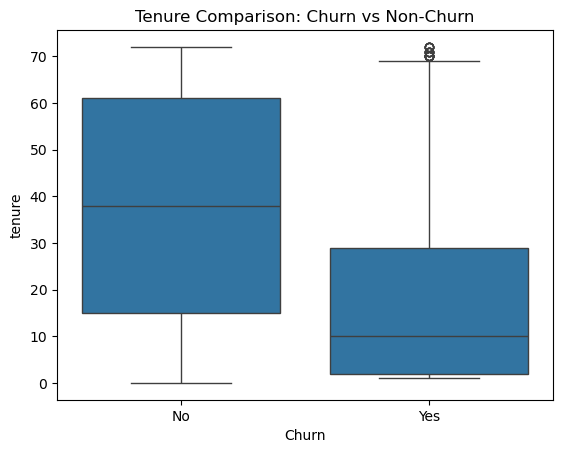

In [65]:
# Tenure comparison between churned and retained customers

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure Comparison: Churn vs Non-Churn")
plt.show()

                  tenure  MonthlyCharges  TotalCharges  Churn_binary
tenure          1.000000        0.247900      0.825880     -0.352229
MonthlyCharges  0.247900        1.000000      0.651065      0.193356
TotalCharges    0.825880        0.651065      1.000000     -0.199484
Churn_binary   -0.352229        0.193356     -0.199484      1.000000


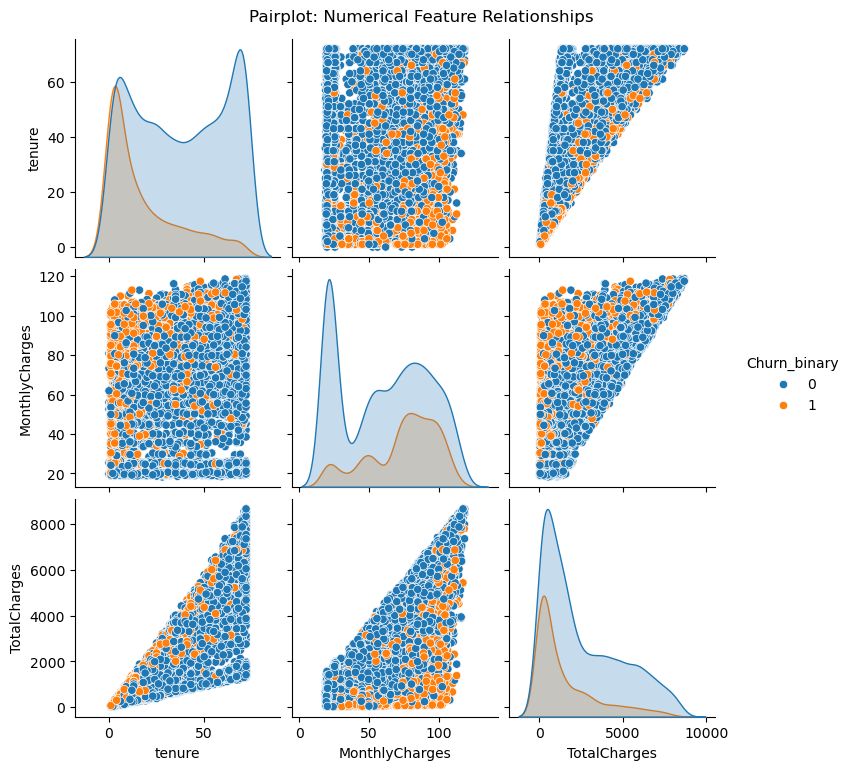

In [66]:
# ==========================================
# CORRELATION BETWEEN VARIABLES
# ==========================================
# Convert 'Churn' to numeric (Yes = 1, No = 0) for correlation analysis

df['Churn_binary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display correlation matrix for numeric variables
print(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_binary']].corr())

# Visualize relationships between numerical features
sns.pairplot(df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn_binary']], hue='Churn_binary')
plt.suptitle("Pairplot: Numerical Feature Relationships", y=1.02)
plt.show()

In [67]:
# ==========================================
# TRAIN-TEST SPLIT
# ==========================================

from sklearn.model_selection import train_test_split

# Drop unnecessary columns and define target variable
X = df.drop(['Churn', 'customerID', 'Churn_binary'], axis=1) 
y = df['Churn_binary']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# MAKE A COPY TO AVOID "SettingWithCopyWarning" FROM PANDAS
X_train = X_train.copy()
X_test = X_test.copy()

In [68]:
# ==========================================
# DATA IMPUTATION & ENCODING
# ==========================================
# Fill missing values in numerical columns with the median

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# IMPUTATION
for col in numeric_features:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    median = X_train[col].median()
    X_train[col] = X_train[col].fillna(median)

for col in numeric_features:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
    X_test[col] = X_test[col].fillna(median)

In [69]:
# One-hot encode categorical variables (Change Numerical Data to Categorical Data)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns between train and test data
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [70]:
# Verify that no missing values remain

print(X_test_encoded.isnull().sum().sum())  # Output should be 0

0


In [72]:
# ==========================================
# MODELING - RANDOM FOREST
# ==========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Initialize Random Forest with balanced class weights to handle class imbalance
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on encoded training data
model.fit(X_train_encoded, y_train)

# Predict churn probabilities for test data
y_proba = model.predict_proba(X_test_encoded)[:, 1]

# Convert probabilities to binary predictions using threshold 0.5
y_pred = (y_proba >= 0.5).astype(int)

# Evaluate model performance using AUC-ROC and classification report
print("AUC-ROC (RandomForest):", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


AUC-ROC (RandomForest): 0.8211359115451186
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [74]:
# ==========================================
# MODELING - XGBOOST
# ==========================================

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Initialize XGBoost model with imbalance adjustment (scale_pos_weight)
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train) 
)

# Train the XGBoost model
xgb_model.fit(X_train_encoded, y_train)

# Predict churn probabilities and binary labels
xgb_y_proba = xgb_model.predict_proba(X_test_encoded)[:, 1]
xgb_y_pred = (xgb_y_proba >= 0.5).astype(int)

# Evaluate XGBoost model performance
print("AUC-ROC (XGBoost):", roc_auc_score(y_test, xgb_y_proba))
print(classification_report(y_test, xgb_y_pred))


AUC-ROC (XGBoost): 0.8315675940995633
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



In [75]:
print(X_test_encoded.isnull().sum().sum())  # Must 0

0


In [76]:
# PREDICTION
y_pred = best_xgb.predict(X_test_encoded)
y_proba = best_xgb.predict_proba(X_test_encoded)[:, 1]

In [77]:
# ==========================================
# PREDICTION RESULTS & INTERPRETATION
# ==========================================
# Add prediction results back into the test dataset

df_test = df.loc[X_test.index].copy()
df_test['Predicted_Churn'] = y_pred
df_test['Churn_Probability'] = y_proba

print(df_test[['customerID', 'Churn', 'Predicted_Churn', 'Churn_Probability']])

      customerID Churn  Predicted_Churn  Churn_Probability
437   4376-KFVRS    No                0           0.026085
2280  2754-SDJRD    No                1           0.812520
2235  9917-KWRBE    No                0           0.071181
4460  0365-GXEZS    No                0           0.321022
3761  9385-NXKDA    No                0           0.017426
...          ...   ...              ...                ...
5143  5204-HMGYF    No                0           0.052471
4439  9950-MTGYX    No                0           0.012416
3857  3675-EQOZA    No                0           0.116614
4758  3646-ITDGM    No                0           0.017359
5613  3913-FCUUW    No                0           0.006802

[1409 rows x 4 columns]


In [78]:
# Compare predicted vs actual churn outcomes
comparison = df_test[['Churn', 'Predicted_Churn', 'Churn_Probability']].copy()
comparison['Churn'] = comparison['Churn'].map({'Yes': 1, 'No': 0})
comparison['Correct'] = (comparison['Churn'] == comparison['Predicted_Churn'])

# Display examples of incorrect predictions (false positives/negatives)
incorrect = comparison[comparison['Correct'] == False]
print("Incorrect Predictions:")
print(incorrect.head())

Incorrect Predictions:
      Churn  Predicted_Churn  Churn_Probability  Correct
2280      0                1           0.812520    False
5748      0                1           0.598944    False
1639      1                0           0.374894    False
2136      0                1           0.598700    False
761       1                0           0.393930    False


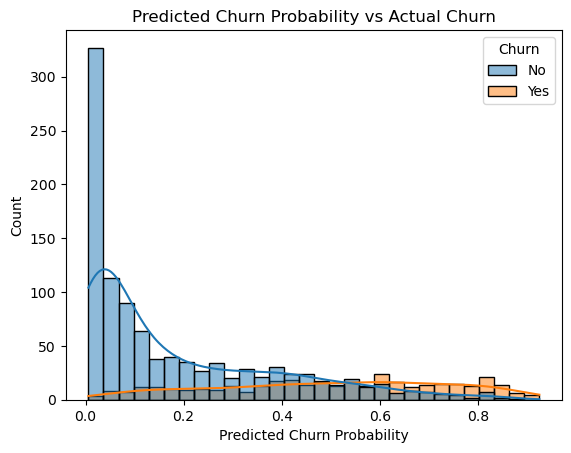

In [79]:
# ==========================================
# VISUALIZATION: DISTRIBUTION OF PREDICTED PROBABILITIES
# ==========================================
# Plot histogram of predicted churn probabilities, separated by actual churn labels

sns.histplot(df_test, x='Churn_Probability', hue='Churn', bins=30, kde=True)
plt.title("Predicted Churn Probability vs Actual Churn")
plt.xlabel("Predicted Churn Probability")
plt.ylabel("Count")
plt.show()

In [80]:
# ==========================================
# TYPE SAFETY: HANDLE BOOLEAN COLUMNS
# ==========================================
# Some columns from get_dummies() may have boolean dtype; convert to float for SHAP/model compatibility

bool_cols = X_train_encoded.select_dtypes(include=['bool']).columns

X_train_encoded[bool_cols] = X_train_encoded[bool_cols].astype(float)
X_test_encoded[bool_cols] = X_test_encoded[bool_cols].astype(float)


In [81]:
# Ensure both training and test data have the same columns in the same order

assert (X_train_encoded.columns == X_test_encoded.columns).all()


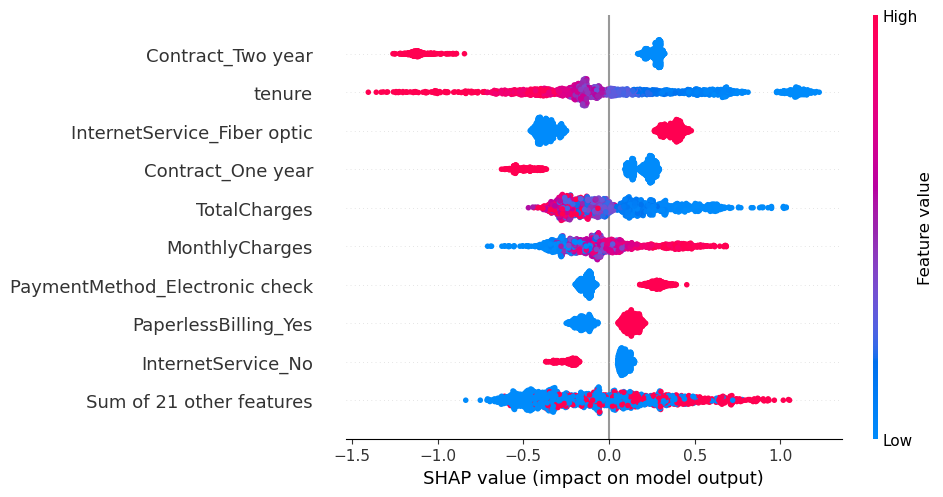

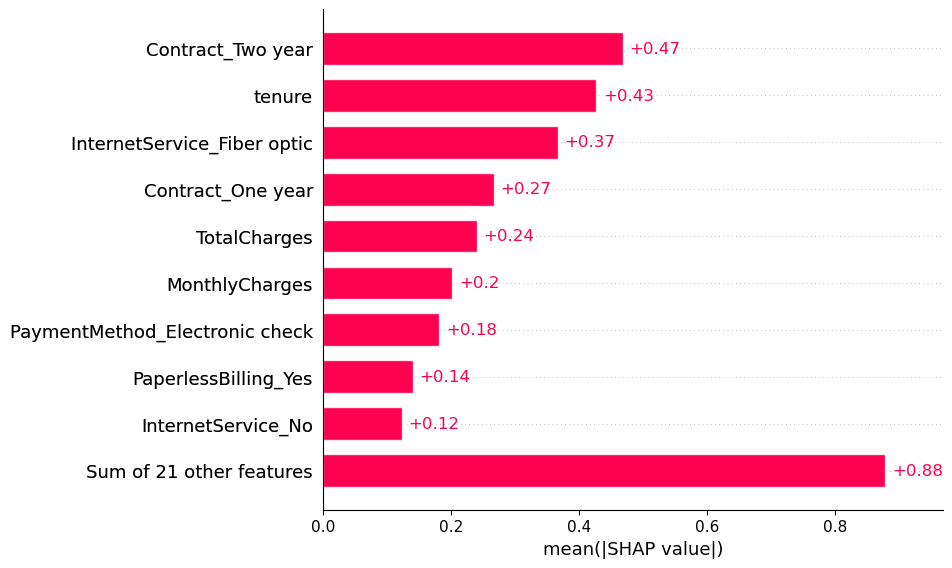

In [82]:
# ==========================================
# SHAP EXPLAINER (MODEL INTERPRETATION)
# ==========================================
# Use SHAP to explain the XGBoost model predictions
# NOTE: shap.Explainer automatically selects TreeExplainer for tree-based models like XGBoost.

import shap

# Create SHAP explainer using the trained XGBoost model and training data
explainer = shap.Explainer(best_xgb, X_train_encoded)
shap_values = explainer(X_test_encoded)

# For some SHAP versions, shap_values may have a slightly different structure.
# We create an Explanation object for compatibility with SHAP plotting functions.
explanation_class1 = shap.Explanation(
    values=shap_values.values,  
    base_values=shap_values.base_values,  
    data=X_test_encoded.values, 
    feature_names=X_test_encoded.columns
)

# ==========================================
# SHAP VISUALIZATION: BEESWARM & BAR PLOTS
# ==========================================
# Beeswarm plot — shows feature impact for individual predictions

shap.plots.beeswarm(explanation_class1, max_display=10)
shap.plots.bar(explanation_class1, max_display=10)


In [ ]:
# ==========================================
# EXPORT ALL DATA TO EXCEL (FULL PREDICTION)
# ==========================================

# Make a full copy of the original dataset for final predictions
df_full = df.copy()

# Separate features (exclude target and identifier columns)
X_all = df_full.drop(['Churn', 'customerID', 'Churn_binary'], axis=1)

# ==========================================
# DATA ENCODING
# ==========================================

# Encode all categorical variables using one-hot encoding
X_all_encoded = pd.get_dummies(X_all, drop_first=True)

# Reindex columns to match the training set (fill any missing columns with 0)
X_all_encoded = X_all_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# ==========================================
# TYPE SAFETY: BOOLEAN TO FLOAT
# ==========================================
# Convert any boolean columns to float to ensure model compatibility
bool_cols_all = X_all_encoded.select_dtypes(include=['bool']).columns
X_all_encoded[bool_cols_all] = X_all_encoded[bool_cols_all].astype(float)

# ==========================================
# PREDICTION (FULL DATASET)
# ==========================================
# Predict churn labels and probabilities for all customers using the trained XGBoost model
df_full['Predicted_Churn'] = xgb_model.predict(X_all_encoded)
df_full['Churn_Probability'] = xgb_model.predict_proba(X_all_encoded)[:, 1]

# ==========================================
# RISK LEVEL CLASSIFICATION
# ==========================================
# Define a function to categorize customers by churn probability
def risk_label(prob):
    if prob >= 0.75:
        return "High Risk"
    elif prob >= 0.5:
        return "Medium Risk"
    else:
        return "Low Risk"

# Apply risk level classification based on churn probability
df_full['Risk_Level'] = df_full['Churn_Probability'].apply(risk_label)

# ==========================================
# EXPORT RESULTS TO EXCEL
# ==========================================
# Export the full dataset with predictions and risk levels to Excel
df_full.to_excel("churn_full_predictions.xlsx", index=False)
